In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.linear_model import LinearRegression as LR,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_15_Auto_MPG.csv')

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
data.shape

(398, 9)

In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
#Checking for missing or null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [9]:
data.origin.unique()

array([1, 3, 2], dtype=int64)

In [10]:
data['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [11]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
# This Code will Count the occuring of the '?' in all the columns
for i in data.columns:
    t = data[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in mpg
0
The Value Counts of ? in cylinders
0
The Value Counts of ? in displacement
0
The Value Counts of ? in horsepower
6
The Value Counts of ? in weight
0
The Value Counts of ? in acceleration
0
The Value Counts of ? in model year
0
The Value Counts of ? in origin
0
The Value Counts of ? in car name
0


As we can see, horsepower have a value '?'. We can remove those data.

In [13]:
data = data[data.horsepower != '?']

In [14]:
data.shape

(392, 9)

In [15]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

As we can see, hoursepower is having datatype as object. We will convert hoursepower into float.

In [16]:
data.horsepower = data.horsepower.astype('float')


In [17]:
#Checking for datatype again
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
data['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [19]:
data['car name'].value_counts()

amc matador              5
ford pinto               5
toyota corolla           5
amc hornet               4
chevrolet impala         4
                        ..
ford fairmont            1
buick century limited    1
dodge aries se           1
chevrolet bel air        1
ford granada gl          1
Name: car name, Length: 301, dtype: int64

In [20]:
#Working with car name, split variable 'car name' as 'brand name' and 'model name'

data['Brand'] = data['car name'].str.extract('([A-Za-z]+)\s', expand=False)

In [21]:
data['Brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', nan, 'chevroelt', 'capri', 'vw', 'benz',
       'cadillac', 'subaru', 'mercedes', 'vokswagen', 'triumph', 'nissan'],
      dtype=object)

In [22]:
#Correcting some brand spelling
data['Brand']= data['Brand'].replace(np.NaN, 'subaru')
data['Brand']= data['Brand'].replace('chevroelt', 'chevrolet')
data['Brand']= data['Brand'].replace('vw', 'volkswagen')
data['Brand']= data['Brand'].replace('toyouta', 'toyota')
data['Brand']= data['Brand'].replace('vokswagen', 'volkswagen')
data['Brand']= data['Brand'].replace('maxda', 'mazda')
data['Brand']= data['Brand'].replace('mazada', 'mazda')
data['Brand']= data['Brand'].replace('chevy', 'chevrolet')

In [23]:
data['Brand'].value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
volvo          6
chrysler       6
opel           4
subaru         4
saab           4
renault        3
benz           2
cadillac       2
bmw            2
triumph        1
nissan         1
capri          1
hi             1
mercedes       1
Name: Brand, dtype: int64

As we have seperated brand name from car name. We can encode brand name by using Label Encoder

In [24]:
le = LE()

data['Brand'] = le.fit_transform(data['Brand'])

In [25]:
#Droping car name

data = data.drop(['car name'],axis=1)

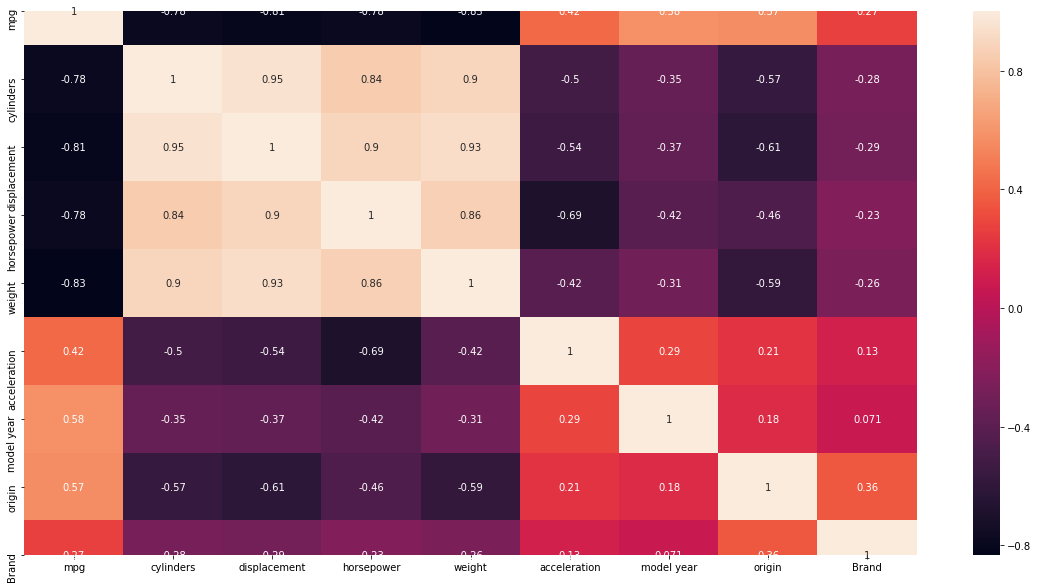

In [26]:
#Checking for correlation of dataset

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()    

From the above heatmap, mpg is good correlated with cylinder, displacement, horsepower and weight.



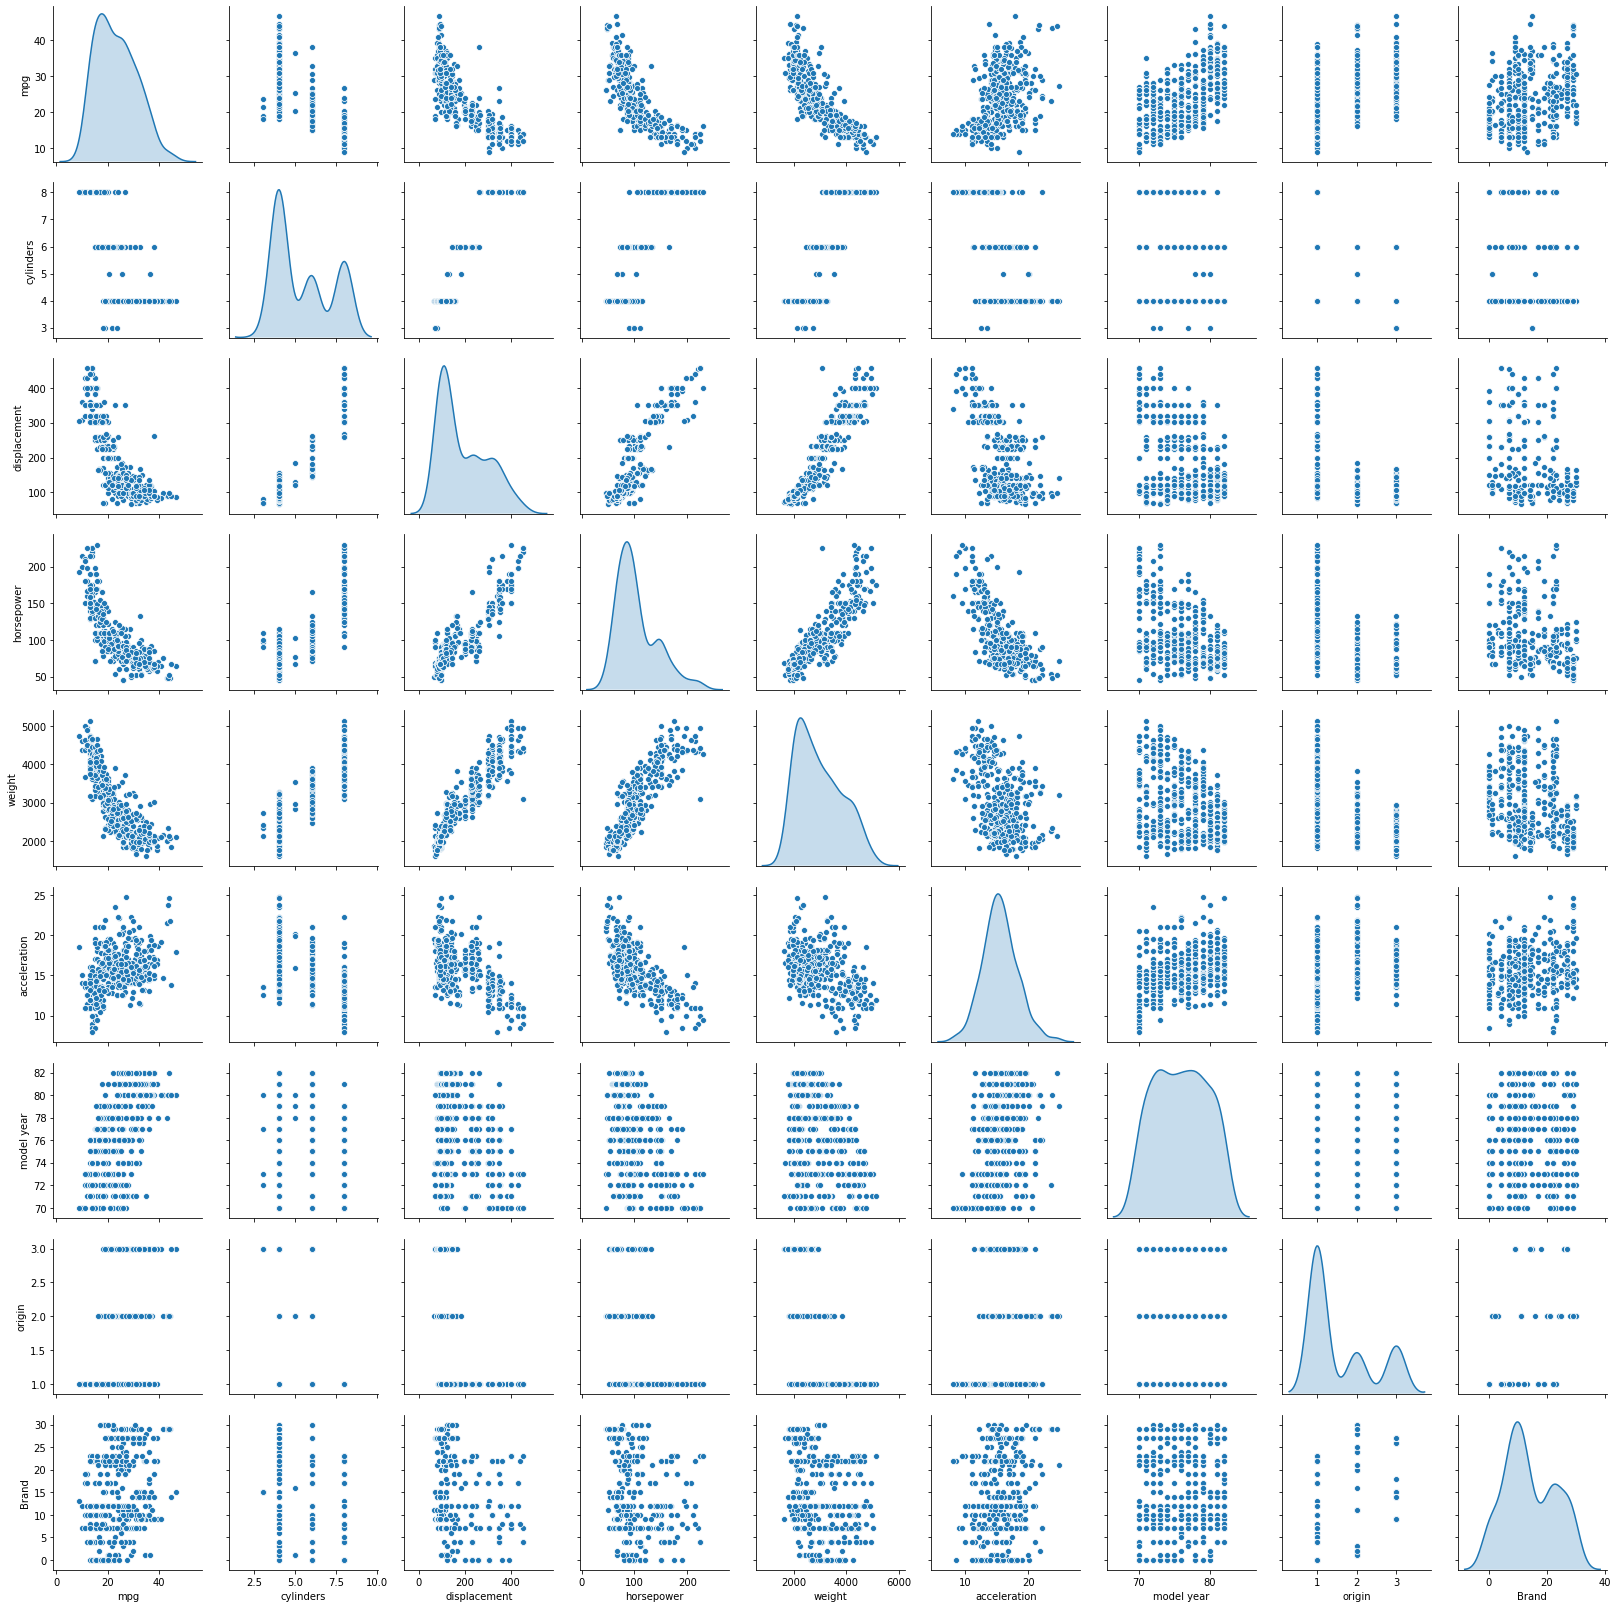

In [27]:
sns.pairplot(data,diag_kind='kde')

As we can see, mpg is negatively correlated with  cylinder, displacement, horsepower and weight.

In [28]:
#Checking for description

data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Brand
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.00000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,14.12500
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,8.66614
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.00000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,7.00000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,12.00000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,22.00000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,30.00000


From the above description, we can see there is differnce between min and max for horsepower, weight

mpg                AxesSubplot(0.125,0.536818;0.133621x0.343182)
cylinders       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
displacement     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
horsepower      AxesSubplot(0.606034,0.536818;0.133621x0.343182)
weight          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
acceleration          AxesSubplot(0.125,0.125;0.133621x0.343182)
model year         AxesSubplot(0.285345,0.125;0.133621x0.343182)
origin              AxesSubplot(0.44569,0.125;0.133621x0.343182)
Brand              AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

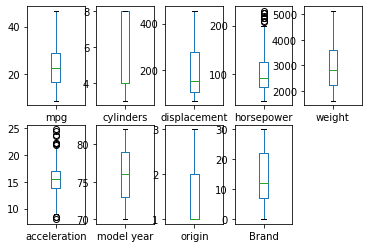

In [29]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,5))

Data seems to be normal for outliers.

### SPLITTING DATA

In [30]:
x = data.drop(["mpg"],axis=1)
y = data.mpg

In [31]:
#Checking for skewness 

x.skew()

cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
Brand           0.230863
dtype: float64

In [32]:
x.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
Brand             int32
dtype: object

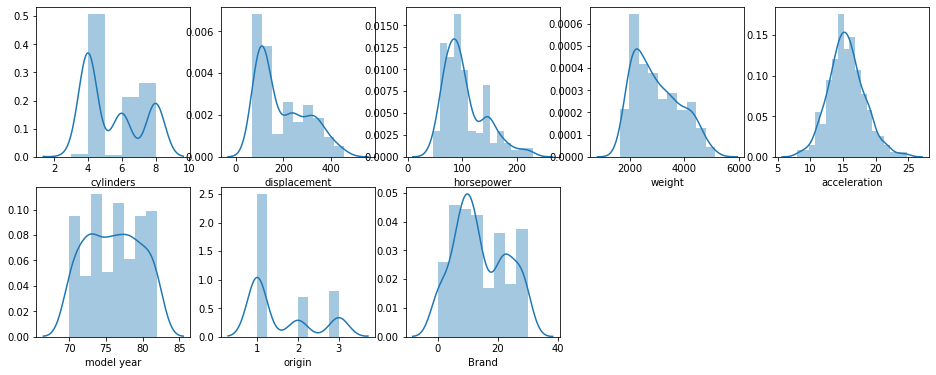

In [33]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

In [34]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.sqrt(x[index])

In [35]:
x.skew()

cylinders       0.429518
displacement    0.453508
horsepower      0.732720
weight          0.333968
acceleration    0.291587
model year      0.019688
origin          0.816930
Brand           0.230863
dtype: float64

### APPLYING REGRESSION TECHNIQUES

In [36]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    
    print('MAE:', mean_absolute_error(test_y, pred_y))
    print('MSE:', mean_squared_error(test_y, pred_y))
    print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))
    plt.figure(figsize=(6,4))
    sns.distplot(test_y - model.predict(test_x))
    plt.title('Distribution of residuals');
    plt.show()
    print("Plotting scatter plot with test and predicted data")
    plt.scatter(x=test_y,y=pred_y)
    plt.show()
    return max_r2_score

Max R2 Score Corresponding to random state  50  is  88.0
MAE: 2.454948355755678
MSE: 8.913277365021656
RMSE: 2.985511240143245


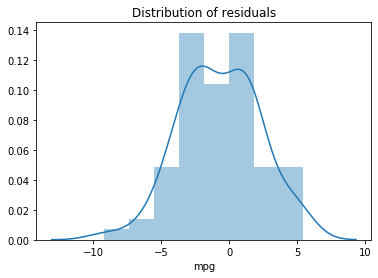

Plotting scatter plot with test and predicted data


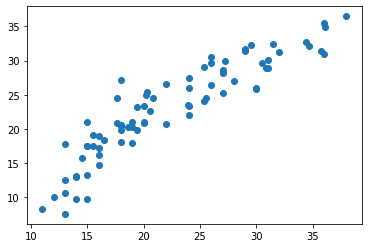

In [37]:
#Linear Regression

lr = LR()
r2_lr = best_model(lr)

In [38]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNR()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 5}

Max R2 Score Corresponding to random state  42  is  91.0
MAE: 1.7701265822784815
MSE: 5.385356962025316
RMSE: 2.3206371887964985


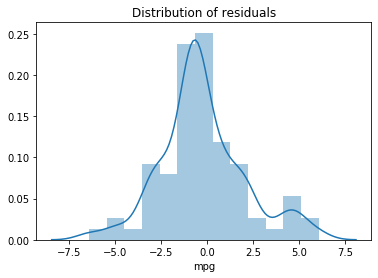

Plotting scatter plot with test and predicted data


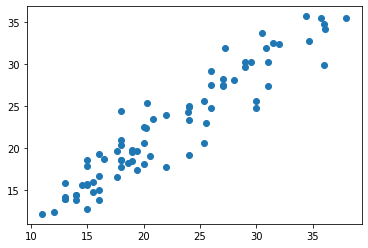

In [39]:
knr = KNR(n_neighbors=5)
r2_knr = best_model(knr)

In [40]:
#Finding best parameters for RFR

rfr = RFR() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 50}

Max R2 Score Corresponding to random state  61  is  94.0
MAE: 1.4983291139240515
MSE: 4.709598683544306
RMSE: 2.170160981020603


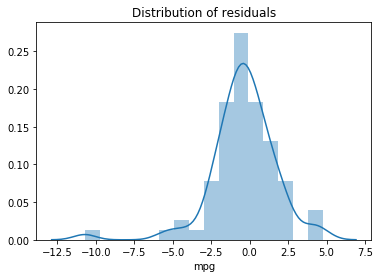

Plotting scatter plot with test and predicted data


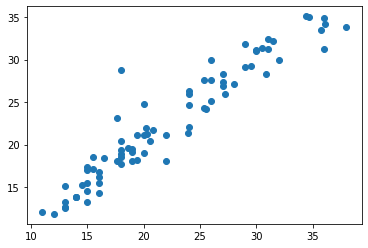

In [41]:
rfr=RFR(n_estimators=50)
r2_rfr = best_model(rfr)

Max R2 Score Corresponding to random state  84  is  88.0
MAE: 2.227848101265823
MSE: 10.76126582278481
RMSE: 3.2804368341403576


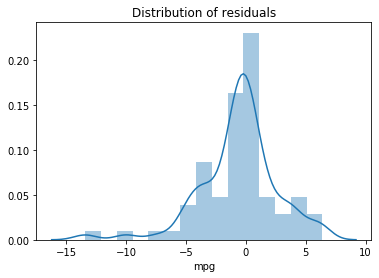

Plotting scatter plot with test and predicted data


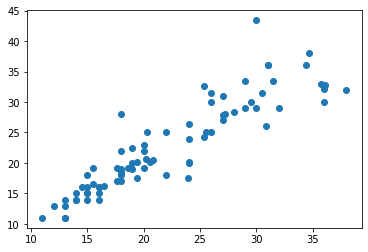

In [42]:
#DTR()

dtr = DTR()
r2_dtr = best_model(dtr)

Max R2 Score Corresponding to random state  44  is  94.0
MAE: 1.577169831626127
MSE: 4.985369921708345
RMSE: 2.23279419600382


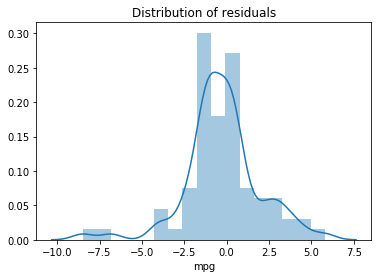

Plotting scatter plot with test and predicted data


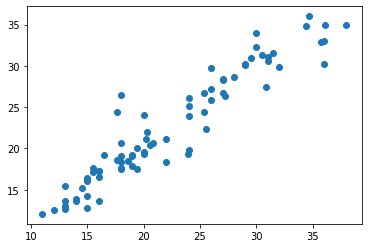

In [43]:
#Checking for GBR()

gbr = GBR()
r2_gbr = best_model(gbr)

In [44]:
scores = [r2_lr,r2_gbr,r2_dtr,r2_rfr,r2_knr]
algorithms = ["Logistic Regression","Gradient Boosting","Decision Tree Regressor","Random Forest","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.0 %
The accuracy score achieved using Gradient Boosting is: 94.0 %
The accuracy score achieved using Decision Tree Regressor is: 88.0 %
The accuracy score achieved using Random Forest is: 94.0 %
The accuracy score achieved using K-Nearest Neighbors is: 91.0 %


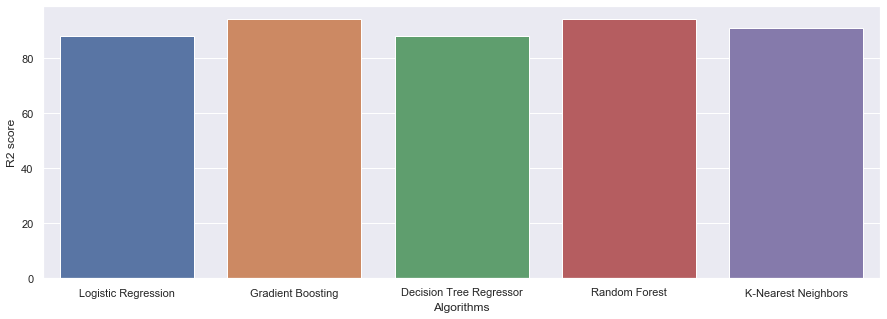

In [45]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("R2 score")

sns.barplot(algorithms,scores)

In [46]:
#Displaying score by train test split
pd.DataFrame(scores,columns = ['R2 Scores'],index = algorithms).sort_values(by = 'R2 Scores',ascending = False)

,R2 Scores
Gradient Boosting,94.0
Random Forest,94.0
K-Nearest Neighbors,91.0
Logistic Regression,88.0
Decision Tree Regressor,88.0


### APPLYING CROSS VAL

In [47]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=10,scoring="r2")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))
    
    r2_score = round(score.mean()*100)
    return r2_score

In [48]:
#Checking for Linear Regression
cv_r2_lr = cross_val_function(lr)

Cross Val Score:  [0.55650013 0.81833129 0.63535383 0.81590141 0.8177338  0.84239077
 0.62983476 0.78597606 0.10801278 0.55728157]
Mean Scores:  0.6567316390725765
Standard deviation:  0.21230970338070354
Score : 66.0


In [49]:
#Checking for KNR

cv_r2_knr = cross_val_function(knr)

Cross Val Score:  [0.88450626 0.85465442 0.81699846 0.88838988 0.71562569 0.88999655
 0.74935306 0.75960462 0.18857574 0.49003151]
Mean Scores:  0.7237736197375116
Standard deviation:  0.21200493310182708
Score : 72.0


In [50]:
#Checking for DTR

cv_r2_dtr = cross_val_function(dtr)

Cross Val Score:  [0.81945468 0.82802007 0.71833131 0.66452619 0.60079234 0.81033782
 0.81479342 0.68204655 0.19810353 0.20843945]
Mean Scores:  0.6344845358813378
Standard deviation:  0.22767927495151632
Score : 63.0


In [51]:
#Checking for RFR

cv_r2_rfr = cross_val_function(rfr)

Cross Val Score:  [0.8735899  0.92019869 0.81644261 0.86523867 0.77539359 0.92075232
 0.75473738 0.78766806 0.33412033 0.54019333]
Mean Scores:  0.7588334888458383
Standard deviation:  0.1758901869012613
Score : 76.0


In [52]:
#Checking for GBR

cv_r2_gbr = cross_val_function(gbr)

Cross Val Score:  [0.84968192 0.90981651 0.86738959 0.85923257 0.73220003 0.87328231
 0.7884421  0.80129506 0.35429982 0.49738174]
Mean Scores:  0.7533021664990126
Standard deviation:  0.17352227445877058
Score : 75.0


In [53]:
cv_scores = [cv_r2_lr,cv_r2_gbr,cv_r2_dtr,cv_r2_rfr,cv_r2_knr]
cv_algorithms = ["Logistic Regression","Gradient Boosting","Decision Tree Regressor","Random Forest","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.0 %
The accuracy score achieved using Gradient Boosting is: 94.0 %
The accuracy score achieved using Decision Tree Regressor is: 88.0 %
The accuracy score achieved using Random Forest is: 94.0 %
The accuracy score achieved using K-Nearest Neighbors is: 91.0 %


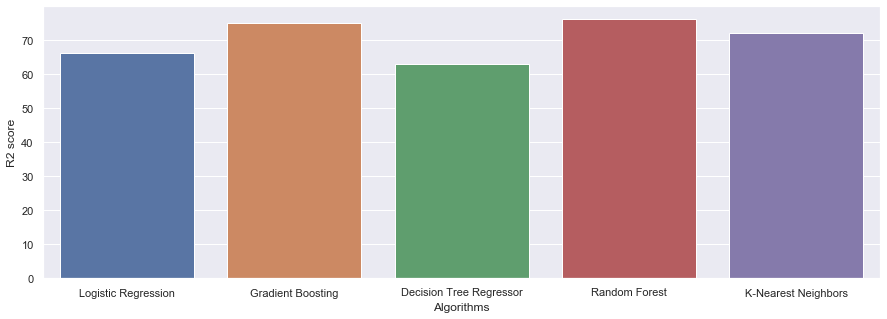

In [54]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("R2 score")

sns.barplot(cv_algorithms,cv_scores)

In [55]:
#Displaying score by cross val
pd.DataFrame(cv_scores,columns = ['R2 Scores'],index = cv_algorithms).sort_values(by = 'R2 Scores',ascending = False)

,R2 Scores
Random Forest,76.0
Gradient Boosting,75.0
K-Nearest Neighbors,72.0
Logistic Regression,66.0
Decision Tree Regressor,63.0


From the above algorithms, we can say that Gradient Boosting Regressor has gave best r2 score of 94. We will use Gradient Boosting to save our model

In [56]:
#GBR gave max score for random state = 44
gbr=GBR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=44)
gbr.fit(train_x,train_y)
pred_y = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  94.0
MAE: 1.4890058818564689
MSE: 3.8163712525162334
RMSE: 1.953553493640815


### CHECKING WITH LASSO AND RIDGE

In [57]:
rr=Ridge(alpha=0.01, fit_intercept=True, normalize=False, max_iter=100,random_state=44)
rr.fit(train_x,train_y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, random_state=44, solver='auto', tol=0.001)

In [58]:
print('Coefficients: ',rr.coef_)
print('Intercept: ',rr.intercept_)
print('Score for test: ',round((rr.score(test_x,test_y))*100))

Coefficients:  [ 0.54809149  0.23275281 -0.55906162 -0.67555988 -0.06984889  0.75850383
  3.70622901  0.00893833]
Intercept:  -0.17364566449357355
Score for test:  84.0


In [59]:
ll=Lasso(alpha=0.01, fit_intercept=True, normalize=False, max_iter=100, random_state=44)
ll.fit(train_x,train_y)
print('Coefficients: ',ll.coef_)
print('Intercept: ',ll.intercept_)
print('Score for test: ',round((ll.score(test_x,test_y))*100))

Coefficients:  [ 0.          0.25943438 -0.51282221 -0.6774032  -0.06169449  0.75852524
  3.50821125  0.01026228]
Intercept:  0.4643279068302526
Score for test:  84.0


ALL OVER MODEL PREDICT WELL, STILL IT IS GOING THROUGH OVERFITTING AS WE HAVE CHECKED WITH LASSO AND RIDGE GIVING SCORE IS LESS THAN GBR SCORE 94

### SAVING MODEL FOR GBR

In [60]:
joblib.dump(gbr, 'Project_15_Auto_MPG.pkl')

['Project_15_Auto_MPG.pkl']

### CONCLUSION

In this project, I've import dataset from csv, then checked for missing or null values and found some missing values in the form of '?' were present in horsepower column, the missing values got removed. Then checked for correlation and description found that some of the feature were higly correlated with msg. 
Then applied some algorithm to predict the outcome, and by using multiple techniques found that Gradient Boostinf Regressor gave  the max score of 94%. Also checked with Lasso and Ridge for under/over fitting. 